1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [3]:
import numpy as np
import numpy.random as npr
from scipy.stats import norm
from scipy.integrate import trapz
import matplotlib.pyplot as plt

npr.seed(2519)

N = 500
std = 1
mean = 0

x = npr.normal(loc = mean, scale = std, size = N)

n, bins, _ = plt.hist(x, bins=20)
plt.ylabel('counts')


mean_bins = 1/2 * ( bins[1:]+bins[:-1])
err = np.sqrt(np.abs(n))

plt.errorbar(mean_bins, n, xerr = 0, yerr = err, fmt='o',capthick=1, capsize=4)

plt.show()

k = np.arange(-3,4,0.01)
std = 1.06*x.std()*np.power(len(x),-1/5)

[plt.plot(k,norm.pdf(k,x[i],scale = std), lw=0.5) for i in range(len(x))]

plt.show()

m = np.sum([norm.pdf(k,x[i],scale = std) for i in range(len(x))],axis=0)
plt.plot(k,m)
plt.show()

norm = trapz(m,k)
normhist = (bins[1]-bins[0])*np.sum(n)

g = m*normhist/norm

plt.hist(x, bins=20)
plt.plot(k,g)
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

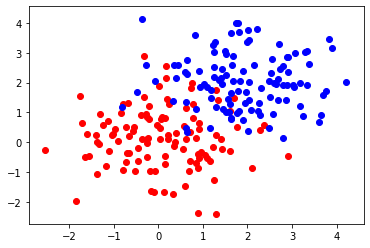

In [4]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

N = 110
def gausssi(mu, sigma):
    x = npr.normal(loc = mu, scale = sigma, size = N)
    y = npr.normal(loc = mu, scale = sigma, size = N)
    return (x, y)
cat1x,cat1y = gausssi(0,1)
cat2x,cat2y = gausssi(2,1)
plt.scatter(cat1x,cat1y, c = 'r')
plt.scatter(cat2x,cat2y, c = 'b')
plt.show()

'wget' is not recognized as an internal or external command,
operable program or batch file.


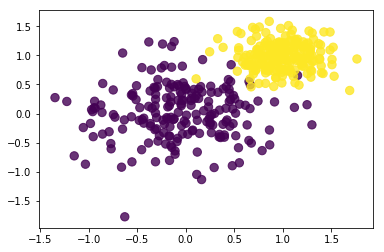

In [1]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [15]:
import numpy as np
import pandas as pd
import random
#!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy #it saves it in the current directory, otherwise command below
#!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy -P ~/data
df = pd.DataFrame(np.load('residuals_261.npy', allow_pickle = True).item())
df.info()
df
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11131 entries, 0 to 11130
Data columns (total 2 columns):
residuals    11131 non-null float64
distances    11131 non-null float64
dtypes: float64(2)
memory usage: 174.0 KB


,residuals,distances
count,11131.000000,11131.000000
mean,-0.616477,9.771465
std,4.163705,5.877819
min,-160.850000,0.000000
25%,-0.330000,4.400000
50%,-0.110000,9.700000
75%,0.060000,14.900000
max,11.320000,24.900000


In [20]:
import scipy as sp
import seaborn as sns
data_cleaned = df[ abs(df["r"]) < 2 ]
data_cleaned.describe()

,residuals,distances
count,10489.000000,10489.000000
mean,-0.121878,9.954824
std,0.439143,5.847142
min,-2.000000,0.000000
25%,-0.280000,4.700000
50%,-0.100000,10.000000
75%,0.070000,15.100000
max,1.992857,24.900000


In [24]:
regr = sp.stats.linregress(data_cleaned["d"], data_cleaned["r"])
print(regr.slope)
print(regr.intercept)
print(regr.rvalue)

0.003259770122030571
-0.15432816763069462
0.04340351052255904


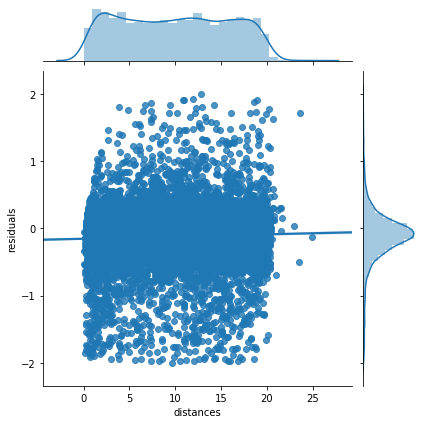

In [27]:
g = sns.jointplot(data=data_cleaned, kind="reg")

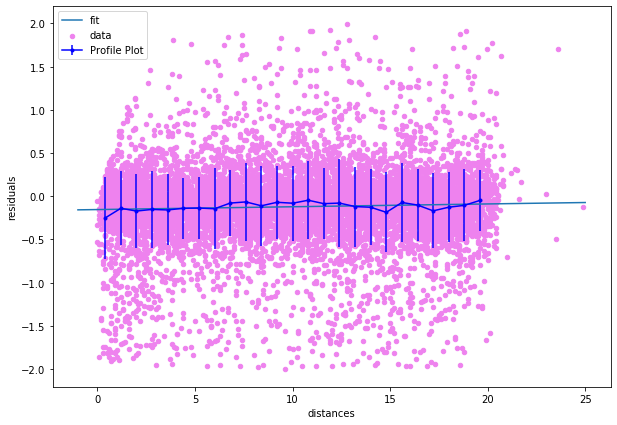

In [33]:
hist, bin_edges = np.histogram( data_cleaned.residuals, np.arange( 0, 20.5 , 0.8 ) )

x = 0.5*(bin_edges[1:] + bin_edges[:-1])
y = [np.mean(data_cleaned.residuals[(data_cleaned["distances"]>=(k-0.25)) & (data_cleaned["distances"]<(k+0.25))]) for k in x]
erry = [np.std(data_cleaned.residuals[(data_cleaned["distances"]>=(k-0.25)) & (data_cleaned["distances"]<(k+0.25))]) for k in x]

fig, ax = plt.subplots(1,1, figsize= (10,7) )
dist = np.arange(-1,25,0.01)

data_cleaned.plot(kind = "scatter", x = "distances", y = "residuals", ax = ax, color = 'violet', label = "data")
plt.errorbar(x ,y ,erry, label='Profile Plot',linewidth=1.5,color='b',marker='.')
plt.plot( dist , dist*regr.slope + regr.intercept, label = "fit" )
plt.legend()
plt.show() 